In [2]:
__author__ = "Lola-Marie Moron, Sandra Fouzari, Danila Kilin"
__credits__ = ["Lola-Marie Moron", "Sandra Fouzari", "Danila Kilin"]
__version__ = "1.0.1"
__maintainer__ = "Lola-Marie Moron, Sandra Fouzari, Danila Kilin"
__email__ = "lola-marie.moron@edu.devinci.fr"
__status__ = "Development"

In [112]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.ticker as ticker
import prince

# Table of Contents
* [Première partie](#chapter1)
    * [Chargement des données](#section_1_1)
    * [Exploration de la donnée](#section_1_2)

# Première partie <a class="anchor" id="chapter1"></a>

## Chargement des données <a class="anchor" id="section_1_1"></a>

In [102]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [5]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [6]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [7]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [8]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [90]:
df.groupby('NObeyesdad').agg(nb_values=('NObeyesdad','count'))

,nb_values
NObeyesdad,
Insufficient_Weight,272
Normal_Weight,287
Obesity_Type_I,351
Obesity_Type_II,297
Obesity_Type_III,324
Overweight_Level_I,290
Overweight_Level_II,290


In [9]:
df.groupby('CAEC').agg(nb_values=('CAEC','count'))

,nb_values
CAEC,
Always,53
Frequently,242
Sometimes,1765
no,51


In [10]:
df.groupby('MTRANS').agg(nb_values=('MTRANS','count'))

,nb_values
MTRANS,
Automobile,457
Bike,7
Motorbike,11
Public_Transportation,1580
Walking,56


In [99]:
catcols = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]

In [103]:
for col in catcols:
    print (col, df[col].unique())

Gender ['Female' 'Male']
family_history_with_overweight ['yes' 'no']
FAVC ['no' 'yes']
CAEC ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE ['no' 'yes']
SCC ['no' 'yes']
CALC ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [104]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Gender,Gender,0.0
Age,Age,0.0
Height,Height,0.0
Weight,Weight,0.0
family_history_with_overweight,family_history_with_overweight,0.0
FAVC,FAVC,0.0
FCVC,FCVC,0.0
NCP,NCP,0.0
CAEC,CAEC,0.0
SMOKE,SMOKE,0.0


We can see that there is no NaN.

# Data visualisation

In [105]:
df[['Gender','NObeyesdad','Age']].groupby(['Gender','NObeyesdad']).count().rename({'Age': 'number'}, axis=1).sort_values(by=['Gender','number'])

number
Gender NObeyesdad                 
Female Obesity_Type_II           2
       Overweight_Level_II     103
       Normal_Weight           141
       Overweight_Level_I      145
       Obesity_Type_I          156
       Insufficient_Weight     173
       Obesity_Type_III        323
Male   Obesity_Type_III          1
       Insufficient_Weight      99
       Overweight_Level_I      145
       Normal_Weight           146
       Overweight_Level_II     187
       Obesity_Type_I          195
       Obesity_Type_II         295

<AxesSubplot:xlabel='NObeyesdad'>

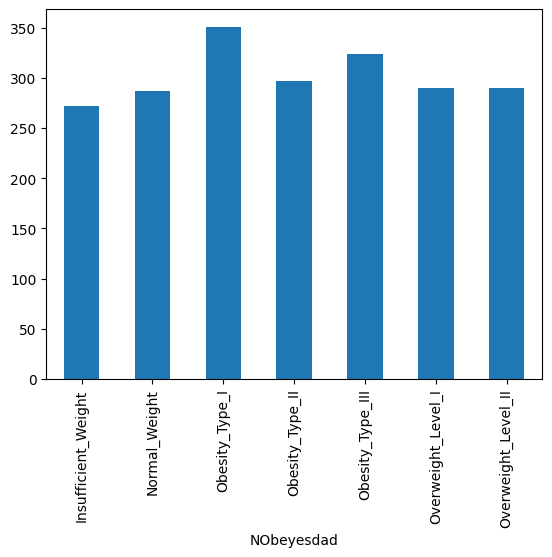

In [11]:
df_viz=df.groupby(['NObeyesdad']).size()
df_viz.plot(kind='bar')

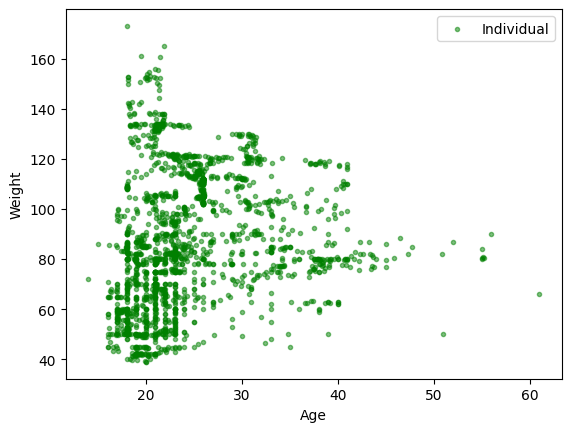

In [12]:
fig, ax = plt.subplots()
ax.scatter(df["Age"], df["Weight"], c="green", alpha=0.5, marker='.', label="Individual")
ax.set_xlabel("Age")
ax.set_ylabel("Weight")
ax.legend()
plt.show()

[]

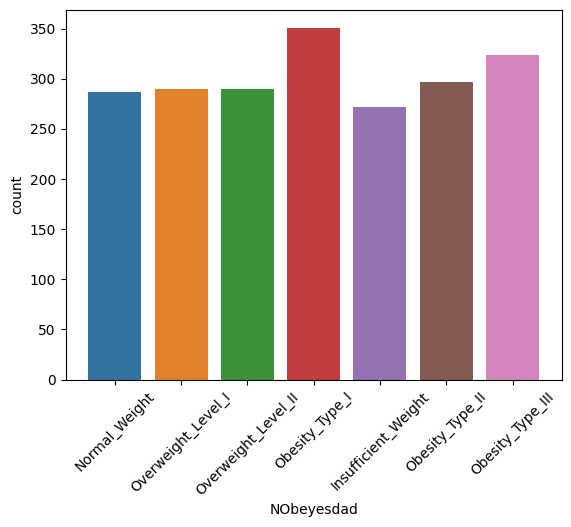

In [106]:
sns.countplot(data=df,x='NObeyesdad')
plt.xticks(rotation=45)
plt.plot()

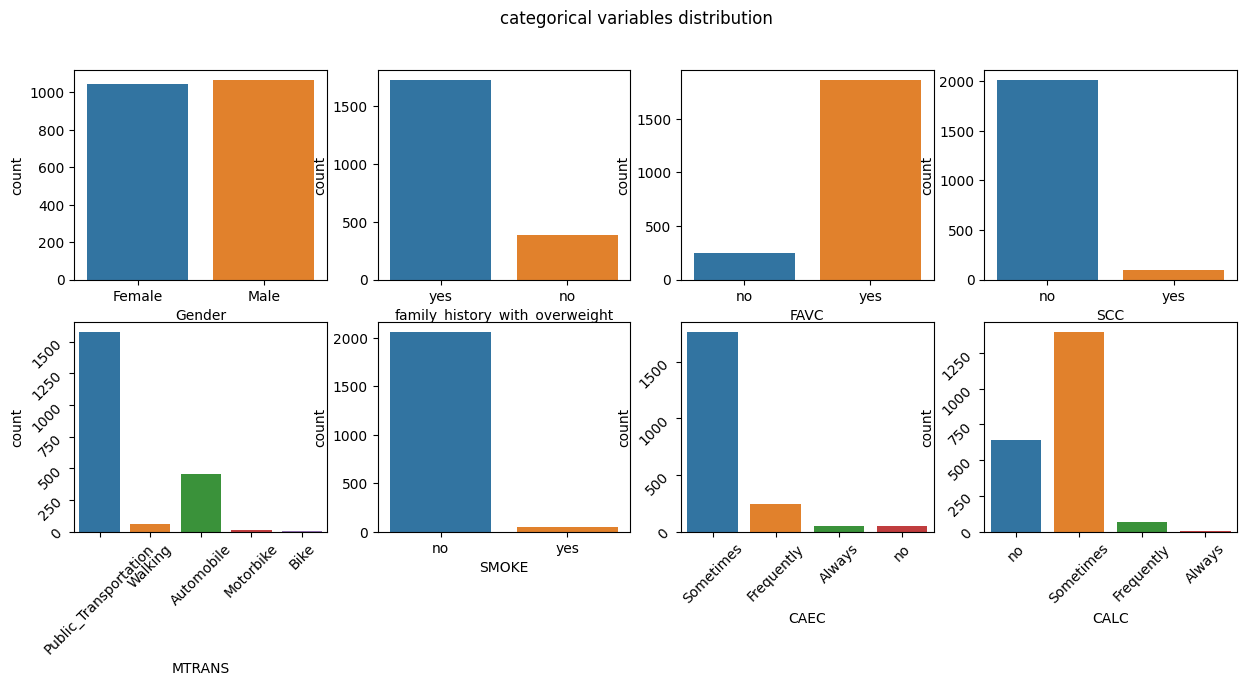

In [107]:
fig, axes = plt.subplots(2, 4, figsize=(15, 6))
locs, labels = plt.xticks()

fig.suptitle('categorical variables distribution')
sns.countplot(ax=axes[0,0], data=df,x='Gender')
sns.countplot(ax=axes[0,1], data=df,x='family_history_with_overweight')
sns.countplot(ax=axes[0,2], data=df,x='FAVC')
sns.countplot(ax=axes[0,3], data=df,x='SCC')
sns.countplot(ax=axes[1,0], data=df,x='MTRANS')
sns.countplot(ax=axes[1,1], data=df,x='SMOKE')
sns.countplot(ax=axes[1,2], data=df,x='CAEC')
sns.countplot(ax=axes[1,3], data=df,x='CALC')  

axes[1,0].tick_params(labelrotation=45)
axes[1,2].tick_params(labelrotation=45)
axes[1,3].tick_params(labelrotation=45)

plt.show()

[]

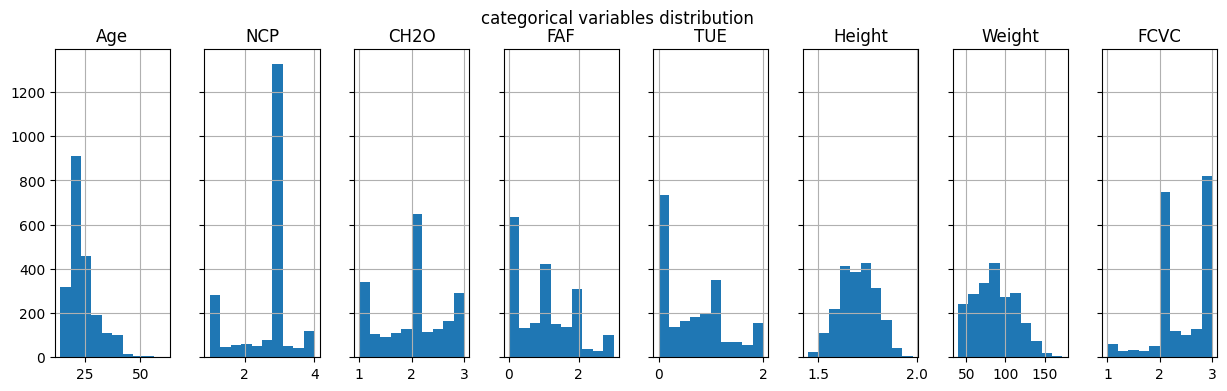

In [108]:
fig, ax = plt.subplots(1,8, sharex='col', sharey='row', figsize=(15, 4))
fig.suptitle('categorical variables distribution')
c=['Age','NCP','CH2O','FAF','TUE','Height','Weight','FCVC']
for i in range(8):
    df.hist(column=c[i], ax=ax[i])
plt.plot()

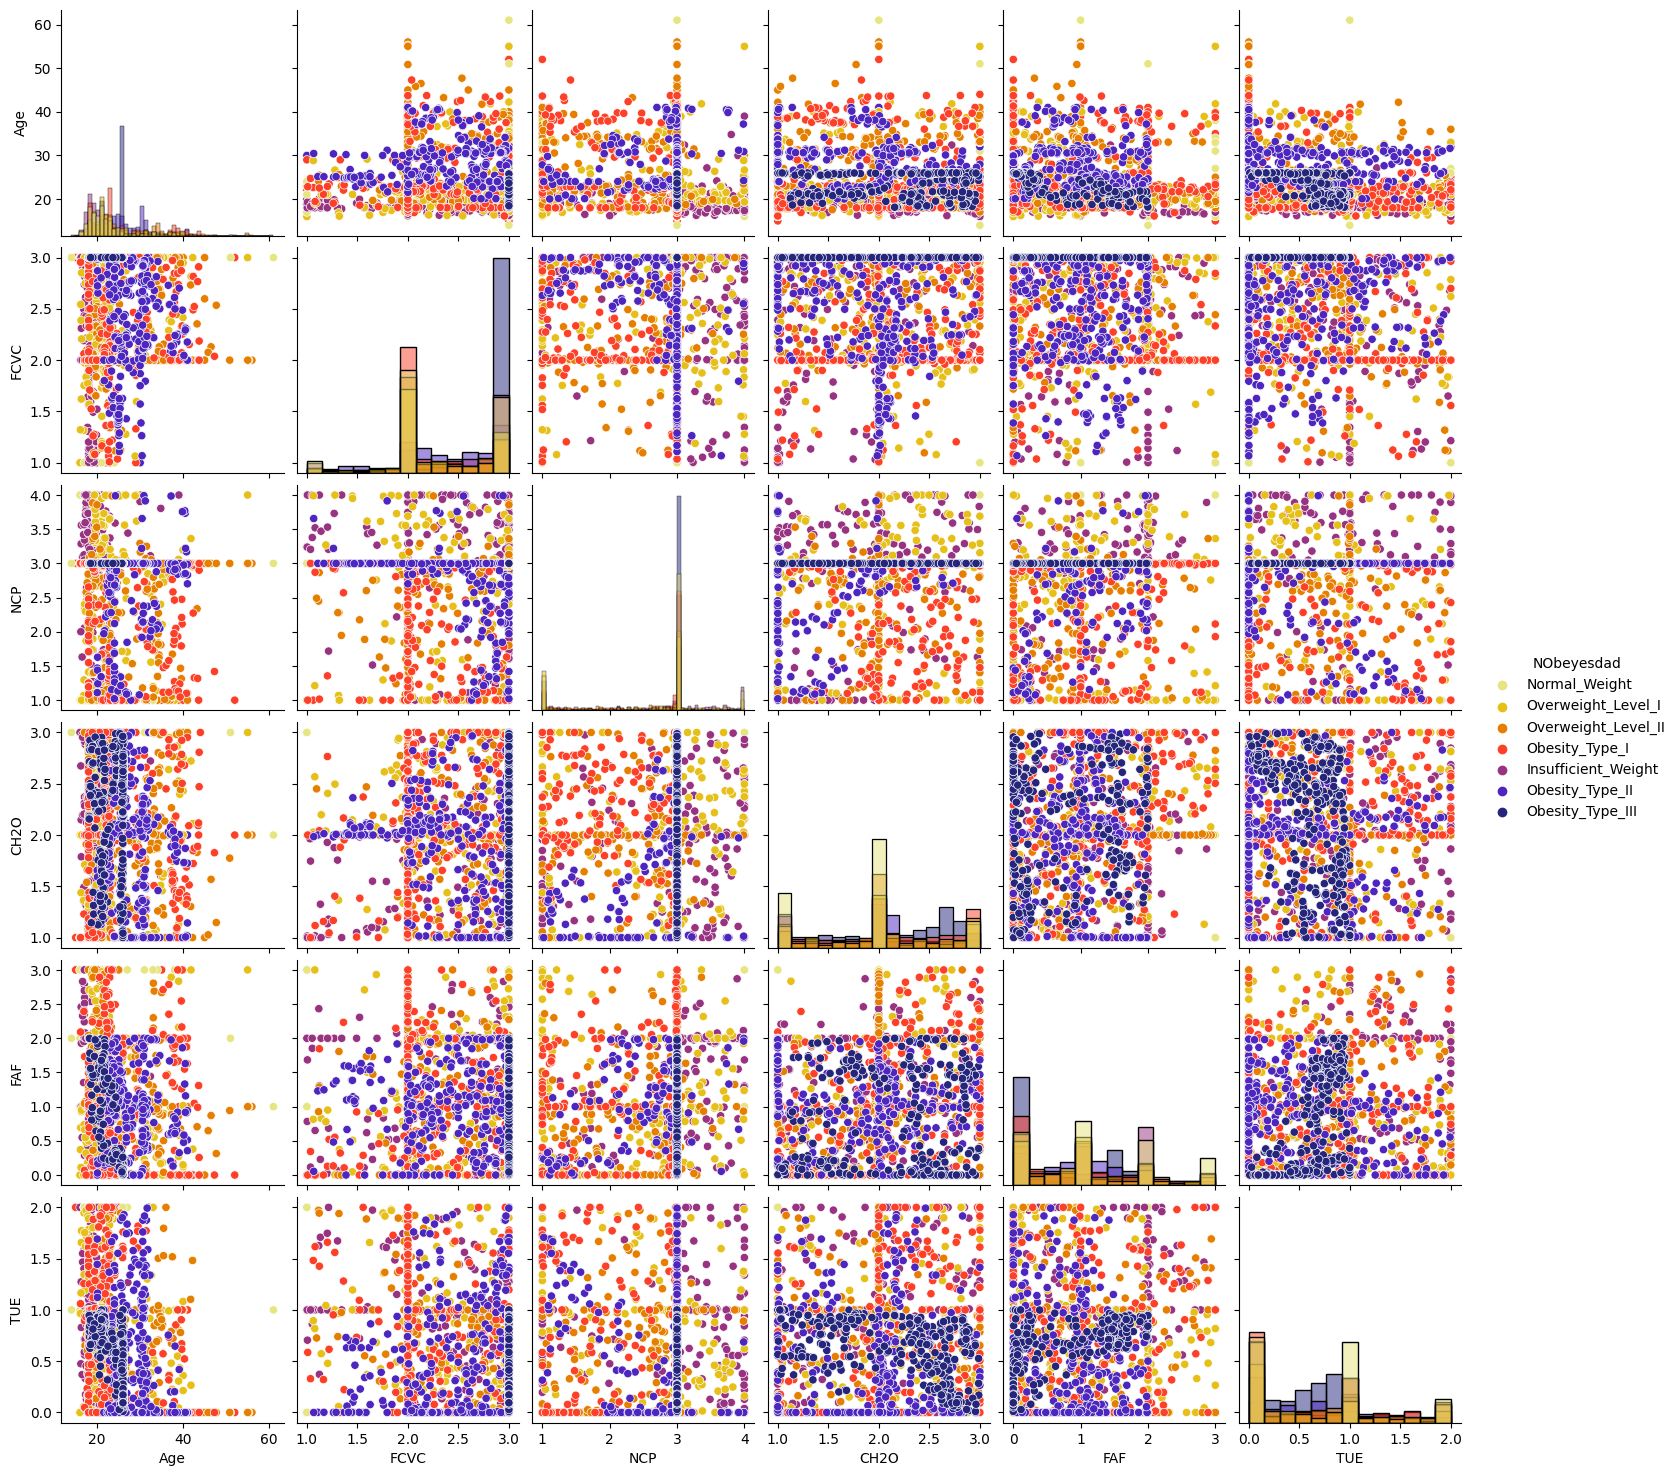

In [115]:
df2=df.copy()
df2.drop(['Weight','Height'], axis=1, inplace=True)
sns.pairplot(df2, diag_kind='hist', hue='NObeyesdad', palette='CMRmap_r')
plt.show()

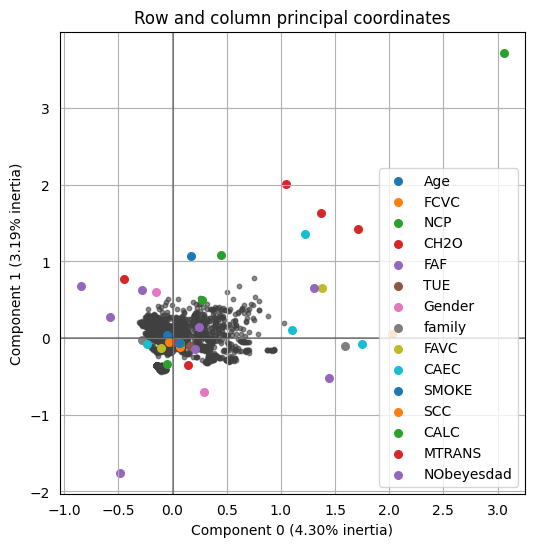

In [113]:
mca = prince.MCA(n_components = 3)
mca = mca.fit(df2)
ax = mca.plot_coordinates(df2)

<AxesSubplot:xlabel='Age', ylabel='NObeyesdad'>

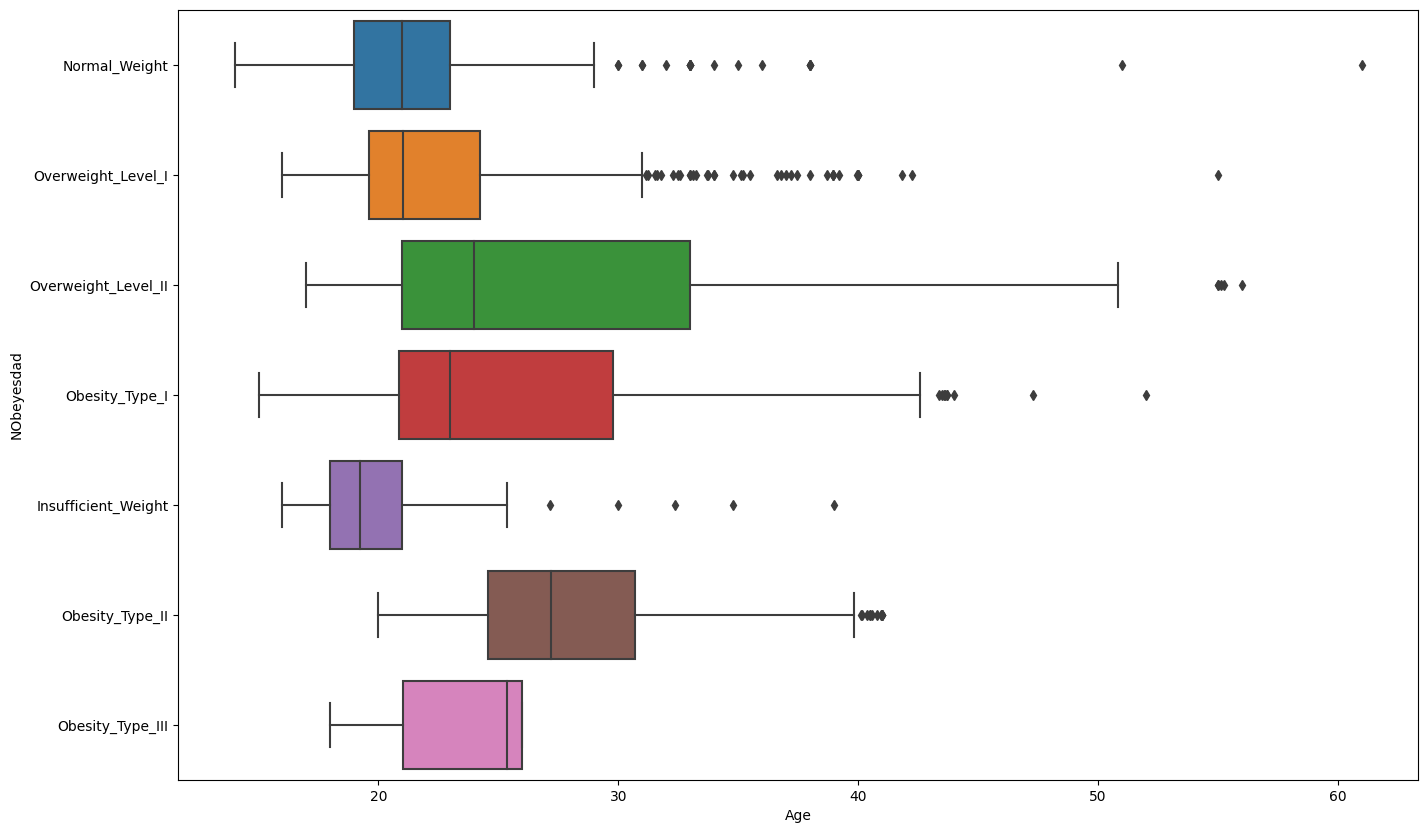

In [116]:
plt.figure(figsize = (16, 10))
sns.boxplot(x=df['Age'],y=df['NObeyesdad'])

## Pre-processing

In [5]:
from sklearn.preprocessing import OneHotEncoder

In [6]:
encoder = OneHotEncoder(sparse=False)

In [7]:
encoder.fit_transform(df[['MTRANS']])

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [8]:
encoder.categories_

[array(['Automobile', 'Bike', 'Motorbike', 'Public_Transportation',
        'Walking'], dtype=object)]

In [9]:
encoder.fit(df[['MTRANS']])

OneHotEncoder(sparse=False)

In [10]:
encoder_df = pd.DataFrame(encoder.fit_transform(df[['MTRANS']]))

In [11]:
encoder_df

,0,1,2,3,4
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
2106,0.0,0.0,0.0,1.0,0.0
2107,0.0,0.0,0.0,1.0,0.0
2108,0.0,0.0,0.0,1.0,0.0
2109,0.0,0.0,0.0,1.0,0.0


In [12]:
#rename encoder_df columns with MTRANS categories underscore encoder.categories_
encoder_df.columns = encoder.get_feature_names(['MTRANS'])

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
encoder_df

,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
2106,0.0,0.0,0.0,1.0,0.0
2107,0.0,0.0,0.0,1.0,0.0
2108,0.0,0.0,0.0,1.0,0.0
2109,0.0,0.0,0.0,1.0,0.0


In [14]:
#drop MTRANS column from df and concat encoder_df
df = df.drop('MTRANS', axis=1)
df = pd.concat([df, encoder_df], axis=1)

In [15]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,...,no,0.000000,1.000000,no,Normal_Weight,0.0,0.0,0.0,1.0,0.0
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,...,yes,3.000000,0.000000,Sometimes,Normal_Weight,0.0,0.0,0.0,1.0,0.0
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,...,no,2.000000,1.000000,Frequently,Normal_Weight,0.0,0.0,0.0,1.0,0.0
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,...,no,2.000000,0.000000,Frequently,Overweight_Level_I,0.0,0.0,0.0,0.0,1.0
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,...,no,0.000000,0.000000,Sometimes,Overweight_Level_II,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,...,no,1.676269,0.906247,Sometimes,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,...,no,1.341390,0.599270,Sometimes,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,...,no,1.414209,0.646288,Sometimes,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,...,no,1.139107,0.586035,Sometimes,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0


In [16]:
#do label encoding for CAEC column
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(df['CAEC'])
df['CAEC'] = label_encoder.transform(df['CAEC'])
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,2,no,...,no,0.000000,1.000000,no,Normal_Weight,0.0,0.0,0.0,1.0,0.0
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,2,yes,...,yes,3.000000,0.000000,Sometimes,Normal_Weight,0.0,0.0,0.0,1.0,0.0
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,2,no,...,no,2.000000,1.000000,Frequently,Normal_Weight,0.0,0.0,0.0,1.0,0.0
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,2,no,...,no,2.000000,0.000000,Frequently,Overweight_Level_I,0.0,0.0,0.0,0.0,1.0
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,2,no,...,no,0.000000,0.000000,Sometimes,Overweight_Level_II,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,2,no,...,no,1.676269,0.906247,Sometimes,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,2,no,...,no,1.341390,0.599270,Sometimes,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,2,no,...,no,1.414209,0.646288,Sometimes,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,2,no,...,no,1.139107,0.586035,Sometimes,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0


In [17]:
print(label_encoder.classes_)
label_encoder.inverse_transform(np.array([0,1,2,3]))

['Always' 'Frequently' 'Sometimes' 'no']


array(['Always', 'Frequently', 'Sometimes', 'no'], dtype=object)

In [18]:
label_encoder = LabelEncoder()
label_encoder.fit(df['CALC'])
df['CALC'] = label_encoder.transform(df['CALC'])
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,2,no,...,no,0.000000,1.000000,3,Normal_Weight,0.0,0.0,0.0,1.0,0.0
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,2,yes,...,yes,3.000000,0.000000,2,Normal_Weight,0.0,0.0,0.0,1.0,0.0
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,2,no,...,no,2.000000,1.000000,1,Normal_Weight,0.0,0.0,0.0,1.0,0.0
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,2,no,...,no,2.000000,0.000000,1,Overweight_Level_I,0.0,0.0,0.0,0.0,1.0
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,2,no,...,no,0.000000,0.000000,2,Overweight_Level_II,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,2,no,...,no,1.676269,0.906247,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,2,no,...,no,1.341390,0.599270,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,2,no,...,no,1.414209,0.646288,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,2,no,...,no,1.139107,0.586035,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0


In [19]:
print(label_encoder.classes_)
label_encoder.inverse_transform(np.array([0,1,2,3]))

['Always' 'Frequently' 'Sometimes' 'no']


array(['Always', 'Frequently', 'Sometimes', 'no'], dtype=object)

In [20]:
label_encoder = LabelEncoder()
label_encoder.fit(df['Gender'])
df['Gender'] = label_encoder.transform(df['Gender'])
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.000000,1.620000,64.000000,yes,no,2.0,3.0,2,no,...,no,0.000000,1.000000,3,Normal_Weight,0.0,0.0,0.0,1.0,0.0
1,0,21.000000,1.520000,56.000000,yes,no,3.0,3.0,2,yes,...,yes,3.000000,0.000000,2,Normal_Weight,0.0,0.0,0.0,1.0,0.0
2,1,23.000000,1.800000,77.000000,yes,no,2.0,3.0,2,no,...,no,2.000000,1.000000,1,Normal_Weight,0.0,0.0,0.0,1.0,0.0
3,1,27.000000,1.800000,87.000000,no,no,3.0,3.0,2,no,...,no,2.000000,0.000000,1,Overweight_Level_I,0.0,0.0,0.0,0.0,1.0
4,1,22.000000,1.780000,89.800000,no,no,2.0,1.0,2,no,...,no,0.000000,0.000000,2,Overweight_Level_II,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,2,no,...,no,1.676269,0.906247,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2107,0,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,2,no,...,no,1.341390,0.599270,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2108,0,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,2,no,...,no,1.414209,0.646288,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2109,0,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,2,no,...,no,1.139107,0.586035,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0


In [21]:
print(label_encoder.classes_)
label_encoder.inverse_transform(np.array([0,1]))

['Female' 'Male']


array(['Female', 'Male'], dtype=object)

In [22]:
label_encoder = LabelEncoder()
label_encoder.fit(df['family_history_with_overweight'])
df['family_history_with_overweight'] = label_encoder.transform(df['family_history_with_overweight'])
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.000000,1.620000,64.000000,1,no,2.0,3.0,2,no,...,no,0.000000,1.000000,3,Normal_Weight,0.0,0.0,0.0,1.0,0.0
1,0,21.000000,1.520000,56.000000,1,no,3.0,3.0,2,yes,...,yes,3.000000,0.000000,2,Normal_Weight,0.0,0.0,0.0,1.0,0.0
2,1,23.000000,1.800000,77.000000,1,no,2.0,3.0,2,no,...,no,2.000000,1.000000,1,Normal_Weight,0.0,0.0,0.0,1.0,0.0
3,1,27.000000,1.800000,87.000000,0,no,3.0,3.0,2,no,...,no,2.000000,0.000000,1,Overweight_Level_I,0.0,0.0,0.0,0.0,1.0
4,1,22.000000,1.780000,89.800000,0,no,2.0,1.0,2,no,...,no,0.000000,0.000000,2,Overweight_Level_II,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,yes,3.0,3.0,2,no,...,no,1.676269,0.906247,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2107,0,21.982942,1.748584,133.742943,1,yes,3.0,3.0,2,no,...,no,1.341390,0.599270,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2108,0,22.524036,1.752206,133.689352,1,yes,3.0,3.0,2,no,...,no,1.414209,0.646288,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2109,0,24.361936,1.739450,133.346641,1,yes,3.0,3.0,2,no,...,no,1.139107,0.586035,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0


In [23]:
print(label_encoder.classes_)
label_encoder.inverse_transform(np.array([0,1]))

['no' 'yes']


array(['no', 'yes'], dtype=object)

In [24]:
label_encoder = LabelEncoder()
label_encoder.fit(df['FAVC'])
df['FAVC'] = label_encoder.transform(df['FAVC'])
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,no,...,no,0.000000,1.000000,3,Normal_Weight,0.0,0.0,0.0,1.0,0.0
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,yes,...,yes,3.000000,0.000000,2,Normal_Weight,0.0,0.0,0.0,1.0,0.0
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,no,...,no,2.000000,1.000000,1,Normal_Weight,0.0,0.0,0.0,1.0,0.0
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,no,...,no,2.000000,0.000000,1,Overweight_Level_I,0.0,0.0,0.0,0.0,1.0
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,no,...,no,0.000000,0.000000,2,Overweight_Level_II,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,no,...,no,1.676269,0.906247,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,no,...,no,1.341390,0.599270,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,no,...,no,1.414209,0.646288,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,no,...,no,1.139107,0.586035,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0


In [25]:
print(label_encoder.classes_)
label_encoder.inverse_transform(np.array([0,1]))

['no' 'yes']


array(['no', 'yes'], dtype=object)

In [26]:
label_encoder = LabelEncoder()
label_encoder.fit(df['SMOKE'])
df['SMOKE'] = label_encoder.transform(df['SMOKE'])
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,...,no,0.000000,1.000000,3,Normal_Weight,0.0,0.0,0.0,1.0,0.0
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,...,yes,3.000000,0.000000,2,Normal_Weight,0.0,0.0,0.0,1.0,0.0
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,...,no,2.000000,1.000000,1,Normal_Weight,0.0,0.0,0.0,1.0,0.0
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,...,no,2.000000,0.000000,1,Overweight_Level_I,0.0,0.0,0.0,0.0,1.0
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,...,no,0.000000,0.000000,2,Overweight_Level_II,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,...,no,1.676269,0.906247,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,...,no,1.341390,0.599270,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,...,no,1.414209,0.646288,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,...,no,1.139107,0.586035,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0


In [27]:
print(label_encoder.classes_)
label_encoder.inverse_transform(np.array([0,1]))

['no' 'yes']


array(['no', 'yes'], dtype=object)

In [28]:
label_encoder = LabelEncoder()
label_encoder.fit(df['SCC'])
df['SCC'] = label_encoder.transform(df['SCC'])
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,...,0,0.000000,1.000000,3,Normal_Weight,0.0,0.0,0.0,1.0,0.0
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,...,1,3.000000,0.000000,2,Normal_Weight,0.0,0.0,0.0,1.0,0.0
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,...,0,2.000000,1.000000,1,Normal_Weight,0.0,0.0,0.0,1.0,0.0
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,...,0,2.000000,0.000000,1,Overweight_Level_I,0.0,0.0,0.0,0.0,1.0
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,...,0,0.000000,0.000000,2,Overweight_Level_II,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,...,0,1.676269,0.906247,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,...,0,1.341390,0.599270,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,...,0,1.414209,0.646288,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,...,0,1.139107,0.586035,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0


In [29]:
print(label_encoder.classes_)
label_encoder.inverse_transform(np.array([0,1]))

['no' 'yes']


array(['no', 'yes'], dtype=object)

In [30]:
#split data into X and y
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1477, 20)
(634, 20)
(1477,)
(634,)


In [33]:
X_train

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
1930,0,25.982113,1.627818,105.428628,1,1,3.000000,3.000000,2,0,1.480750,0,0.098043,0.663492,2,0.0,0.0,0.0,1.0,0.0
1803,0,26.000000,1.656320,111.933010,1,1,3.000000,3.000000,2,0,2.774014,0,0.000000,0.138418,2,0.0,0.0,0.0,1.0,0.0
1198,1,18.000000,1.750097,86.372141,1,1,2.907062,3.000000,2,0,2.740848,0,1.219827,0.037634,2,0.0,0.0,0.0,1.0,0.0
15,0,22.000000,1.700000,66.000000,1,0,3.000000,3.000000,0,0,2.000000,1,2.000000,1.000000,2,0.0,0.0,0.0,1.0,0.0
816,1,23.451595,1.670227,75.000000,1,1,2.000000,3.000000,2,0,2.000000,0,0.129163,1.983678,2,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1,32.290160,1.754956,120.098812,1,1,2.967300,3.000000,2,0,2.530035,0,0.955317,1.339232,2,1.0,0.0,0.0,0.0,0.0
1095,1,23.000000,1.718981,81.669950,1,1,2.000000,1.729553,2,0,1.400247,0,0.887923,1.011983,2,0.0,0.0,0.0,1.0,0.0
1130,0,22.989846,1.650000,80.000000,1,1,2.000000,3.000000,2,0,2.000000,0,0.146919,2.000000,3,0.0,0.0,0.0,1.0,0.0
1294,0,23.000000,1.628168,84.497980,1,1,2.058687,2.962004,2,0,2.010596,0,0.851059,0.630866,3,0.0,0.0,0.0,1.0,0.0


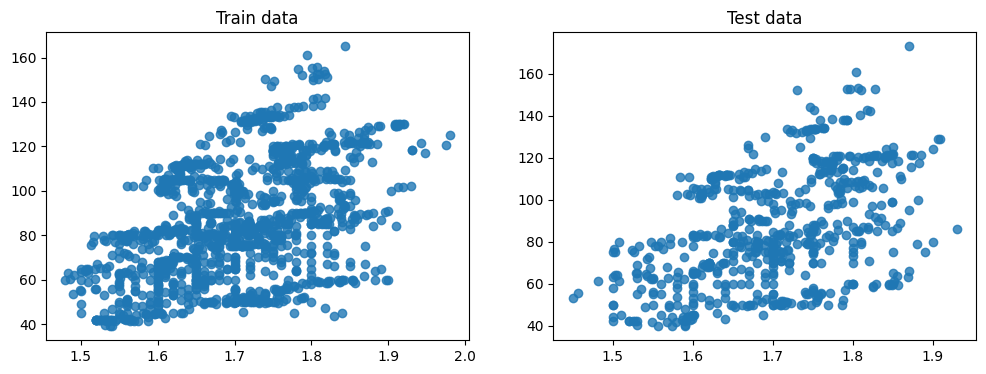

In [34]:
#visualize the train and test data on scatter subplot
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_train.Height, X_train.Weight, alpha=0.8)
plt.title('Train data')
plt.subplot(122)
plt.scatter(X_test.Height, X_test.Weight, alpha=0.8)
plt.title('Test data')
plt.show()

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) # fit only on training data
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)  # apply same transformation to test data

# Test of algorithms

In [68]:
cross_val_score(RandomForestClassifier(), X_train, y_train)

array([0.96621622, 0.94594595, 0.93220339, 0.96271186, 0.9559322 ])

In [69]:
cross_val_score(RandomForestClassifier(), X_train, y_train).mean()

0.9573408153916629

In [70]:
#Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy through cross-validation score : ", cross_val_score(model, X_train, y_train).mean())
print("Basic accuracy score : ", accuracy_score(y_test, y_pred))
print("Matrice de confusion \n", confusion_matrix(y_test, y_pred))
print("\nClassification report \n", classification_report(y_test, y_pred))


Accuracy through cross-validation score :  0.9471965185524507
Basic accuracy score :  0.9384858044164038
Matrice de confusion 
 [[81  5  0  0  0  0  0]
 [ 3 83  0  0  0  7  0]
 [ 0  1 97  3  0  0  1]
 [ 0  0  1 87  0  0  0]
 [ 0  0  1  0 97  0  0]
 [ 0 10  0  0  0 77  1]
 [ 0  3  0  0  0  3 73]]

Classification report 
                      precision    recall  f1-score   support

Insufficient_Weight       0.96      0.94      0.95        86
      Normal_Weight       0.81      0.89      0.85        93
     Obesity_Type_I       0.98      0.95      0.97       102
    Obesity_Type_II       0.97      0.99      0.98        88
   Obesity_Type_III       1.00      0.99      0.99        98
 Overweight_Level_I       0.89      0.88      0.88        88
Overweight_Level_II       0.97      0.92      0.95        79

           accuracy                           0.94       634
          macro avg       0.94      0.94      0.94       634
       weighted avg       0.94      0.94      0.94       634



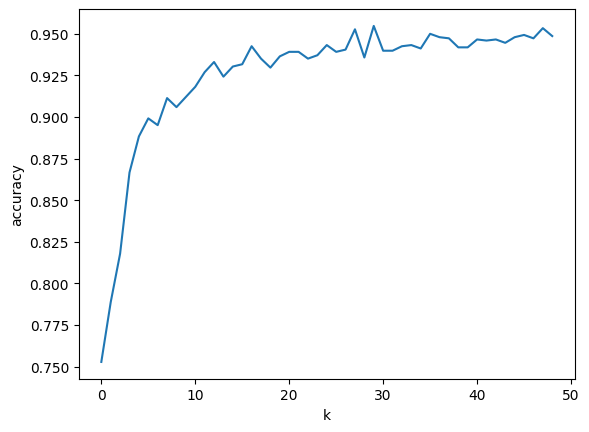

In [73]:
val_score = []
for i in range(1, 50):
    knn = RandomForestClassifier(n_estimators=i)
    score = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy').mean()
    val_score.append(score)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(val_score)

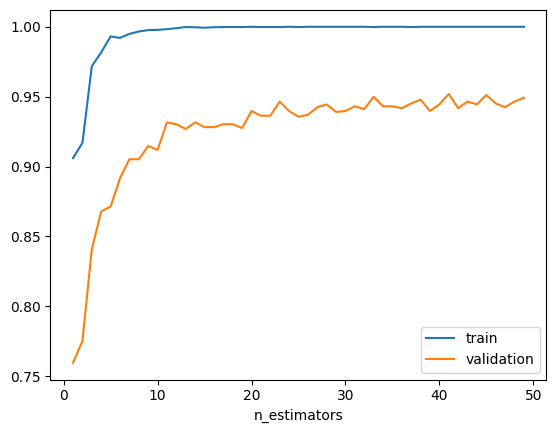

In [75]:
#validation curve
from sklearn.model_selection import validation_curve

param_range = np.arange(1, 50)
train_scores, val_scores = validation_curve(RandomForestClassifier(), X_train, y_train, param_name="n_estimators", param_range=param_range, cv=5)

plt.plot(param_range, np.mean(train_scores, axis=1), label="train")
plt.plot(param_range, np.mean(val_scores, axis=1), label="validation")
plt.xlabel("n_estimators")
plt.legend()
plt.show()

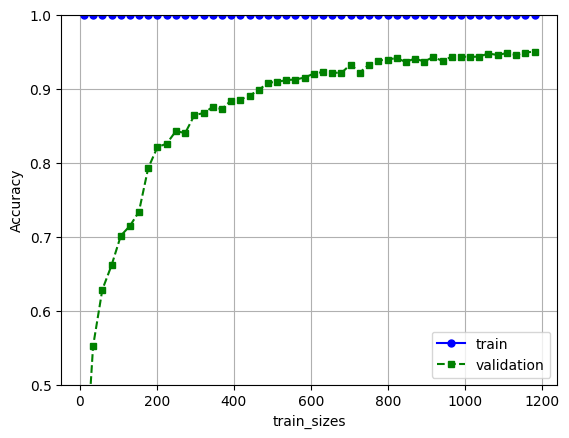

In [81]:
#learning curve
from sklearn.model_selection import learning_curve

N, train_scores, val_scores = learning_curve(RandomForestClassifier(), X_train, y_train, n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

plt.plot(N, train_scores.mean(axis=1), color='blue', marker='o', markersize=5, label='train')
plt.plot(N, val_scores.mean(axis=1), color='green', linestyle='--', marker='s', markersize=5, label='validation')

plt.grid()
plt.xlabel('train_sizes')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.0])
plt.show()

In [82]:
#KNN
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy through cross-validation score : ", cross_val_score(model, X_train, y_train).mean())
print("Basic accuracy score : ", accuracy_score(y_test, y_pred))
print("Matrice de confusion \n", confusion_matrix(y_test, y_pred))
print("\nClassification report \n", classification_report(y_test, y_pred))

Accuracy through cross-validation score :  0.7846862116353641
Basic accuracy score :  0.805993690851735
Matrice de confusion 
 [[79  4  0  0  0  2  1]
 [21 46  7  5  0  6  8]
 [ 1  2 88  7  0  2  2]
 [ 0  0  2 85  0  1  0]
 [ 0  0  0  0 98  0  0]
 [ 6 12  8  2  0 58  2]
 [ 3  4  6  4  1  4 57]]

Classification report 
                      precision    recall  f1-score   support

Insufficient_Weight       0.72      0.92      0.81        86
      Normal_Weight       0.68      0.49      0.57        93
     Obesity_Type_I       0.79      0.86      0.83       102
    Obesity_Type_II       0.83      0.97      0.89        88
   Obesity_Type_III       0.99      1.00      0.99        98
 Overweight_Level_I       0.79      0.66      0.72        88
Overweight_Level_II       0.81      0.72      0.77        79

           accuracy                           0.81       634
          macro avg       0.80      0.80      0.80       634
       weighted avg       0.80      0.81      0.80       634



# Tuning hyperparameters

## Random Forest

In [43]:
def test_hyperparametres(model, hyperparametres):
    grid = GridSearchCV(model, hyperparametres, n_jobs=-1)
    grid.fit(X_train, y_train)
    print(f"Best score: {grid.best_score_}")
    print(f"Best hyperparametres: {grid.best_params_}")
    print(f"Best estimator: {grid.best_estimator_}")
    return grid.best_score_, grid.best_params_, grid.best_estimator_

In [174]:
hyperparametres = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [7, 8, 9, 10],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
model = RandomForestClassifier()
test_hyperparametres(model, hyperparametres)

Best score: 0.9559894640403115
Best hyperparametres: {'bootstrap': True, 'max_depth': 90, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 200}
Best estimator: RandomForestClassifier(max_depth=90, max_features=10, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=200)


(0.9559894640403115,
 {'bootstrap': True,
  'max_depth': 90,
  'max_features': 10,
  'min_samples_leaf': 3,
  'min_samples_split': 10,
  'n_estimators': 200},
 RandomForestClassifier(max_depth=90, max_features=10, min_samples_leaf=3,
                        min_samples_split=10, n_estimators=200))

In [176]:
hyperparametres = {
    'bootstrap': [True],
    'max_depth': [60, 70, 80, 90],
    'max_features': [9, 10, 11],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [8, 9, 10, 11],
    'n_estimators': [100, 200, 400]
}
test_hyperparametres(model, hyperparametres)

Best score: 0.9607352267521758
Best hyperparametres: {'bootstrap': True, 'max_depth': 60, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 400}
Best estimator: RandomForestClassifier(max_depth=60, max_features=10, min_samples_leaf=2,
                       min_samples_split=8, n_estimators=400)


(0.9607352267521758,
 {'bootstrap': True,
  'max_depth': 60,
  'max_features': 10,
  'min_samples_leaf': 2,
  'min_samples_split': 8,
  'n_estimators': 400},
 RandomForestClassifier(max_depth=60, max_features=10, min_samples_leaf=2,
                        min_samples_split=8, n_estimators=400))

In [177]:
hyperparametres = {
    'bootstrap': [True],
    'max_depth': [40, 50, 60, 70],
    'max_features': [9, 10, 11],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [6, 7, 8],
    'n_estimators': [200, 400, 600]
}
test_hyperparametres(model, hyperparametres)

Best score: 0.964111314704535
Best hyperparametres: {'bootstrap': True, 'max_depth': 50, 'max_features': 11, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 200}
Best estimator: RandomForestClassifier(max_depth=50, max_features=11, min_samples_split=6,
                       n_estimators=200)


(0.964111314704535,
 {'bootstrap': True,
  'max_depth': 50,
  'max_features': 11,
  'min_samples_leaf': 1,
  'min_samples_split': 6,
  'n_estimators': 200},
 RandomForestClassifier(max_depth=50, max_features=11, min_samples_split=6,
                        n_estimators=200))

In [178]:
hyperparametres = {
    'bootstrap': [True],
    'max_depth': [30, 40, 50, 60],
    'max_features': [9, 10, 11],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [5, 6, 7],
    'n_estimators': [100, 200, 400]
}
test_hyperparametres(model, hyperparametres)

Best score: 0.9681768208886853
Best hyperparametres: {'bootstrap': True, 'max_depth': 40, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best estimator: RandomForestClassifier(max_depth=40, max_features=10, min_samples_split=5)


(0.9681768208886853,
 {'bootstrap': True,
  'max_depth': 40,
  'max_features': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 100},
 RandomForestClassifier(max_depth=40, max_features=10, min_samples_split=5))

## KNN

In [179]:
hyperparametres = {
    'n_neighbors': [5, 10, 15, 20, 25, 30],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40]
}
model = KNeighborsClassifier()
test_hyperparametres(model, hyperparametres)

Best score: 0.8645716903344022
Best hyperparametres: {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 5, 'weights': 'distance'}
Best estimator: KNeighborsClassifier(leaf_size=20, weights='distance')


(0.8645716903344022,
 {'algorithm': 'auto',
  'leaf_size': 20,
  'n_neighbors': 5,
  'weights': 'distance'},
 KNeighborsClassifier(leaf_size=20, weights='distance'))

In [182]:
hyperparametres = {
    'n_neighbors': [3, 5, 10, 15, 20, 25, 30],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30]
}
test_hyperparametres(model, hyperparametres)

Best score: 0.8740563444800733
Best hyperparametres: {'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 3, 'weights': 'distance'}
Best estimator: KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_neighbors=3,
                     weights='distance')


(0.8740563444800733,
 {'algorithm': 'ball_tree',
  'leaf_size': 10,
  'n_neighbors': 3,
  'weights': 'distance'},
 KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_neighbors=3,
                      weights='distance'))

In [183]:
hyperparametres = {
    'n_neighbors': [2, 3, 5, 10, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [5, 10, 20]
}
test_hyperparametres(model, hyperparametres)

Best score: 0.895048098946404
Best hyperparametres: {'algorithm': 'ball_tree', 'leaf_size': 5, 'n_neighbors': 2, 'weights': 'distance'}
Best estimator: KNeighborsClassifier(algorithm='ball_tree', leaf_size=5, n_neighbors=2,
                     weights='distance')


(0.895048098946404,
 {'algorithm': 'ball_tree',
  'leaf_size': 5,
  'n_neighbors': 2,
  'weights': 'distance'},
 KNeighborsClassifier(algorithm='ball_tree', leaf_size=5, n_neighbors=2,
                      weights='distance'))

In [187]:
hyperparametres = {
    'n_neighbors': [1, 2, 3, 5],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [3, 5, 10]
}
test_hyperparametres(model, hyperparametres)

Best score: 0.895048098946404
Best hyperparametres: {'algorithm': 'ball_tree', 'leaf_size': 3, 'n_neighbors': 1, 'weights': 'uniform'}
Best estimator: KNeighborsClassifier(algorithm='ball_tree', leaf_size=3, n_neighbors=1)


(0.895048098946404,
 {'algorithm': 'ball_tree',
  'leaf_size': 3,
  'n_neighbors': 1,
  'weights': 'uniform'},
 KNeighborsClassifier(algorithm='ball_tree', leaf_size=3, n_neighbors=1))

# Test various classification algorithms

/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Accuracy scoring Logisitc Rregression: 0.858044
Accuracy through cross validation Logisitc Rregression: 0.863946
Accuracy scoring Linear Discriminant Analysis: 0.884858
Accuracy through cross validation Linear Discriminant Analysis: 0.894420
Accuracy scoring KNN: 0.805994
Accuracy through cross validation KNN: 0.788123
Accuracy scoring Decision Tree: 0.914826
Accuracy through cross validation Decision Tree: 0.941777
Accuracy scoring Gaussian Naive Bayes: 0.550473
Accuracy through cross validation Gaussian Naive Bayes: 0.523410
Accuracy scoring Support Vector Machine: 0.859621
Accuracy through cross validation Support Vector Machine: 0.857855
Accuracy scoring Random Forest: 0.935331
Accuracy through cross validation Random Forest: 0.954638
Accuracy scoring Gradient Boosting: 0.940063
Accuracy through cross validation Gradient Boosting: 0.959391
Accuracy scoring Extra Trees: 0.925868
Accuracy through cross validation Extra Trees: 0.929592
Accuracy scoring Ada Boost: 0.358044
Accuracy thr

/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multi

Accuracy scoring Multilayer Perceptron: 0.906940
Accuracy through cross validation Multilayer Perceptron: 0.901163
Accuracy scoring XGBoost: 0.645110
Accuracy through cross validation XGBoost: 0.673028


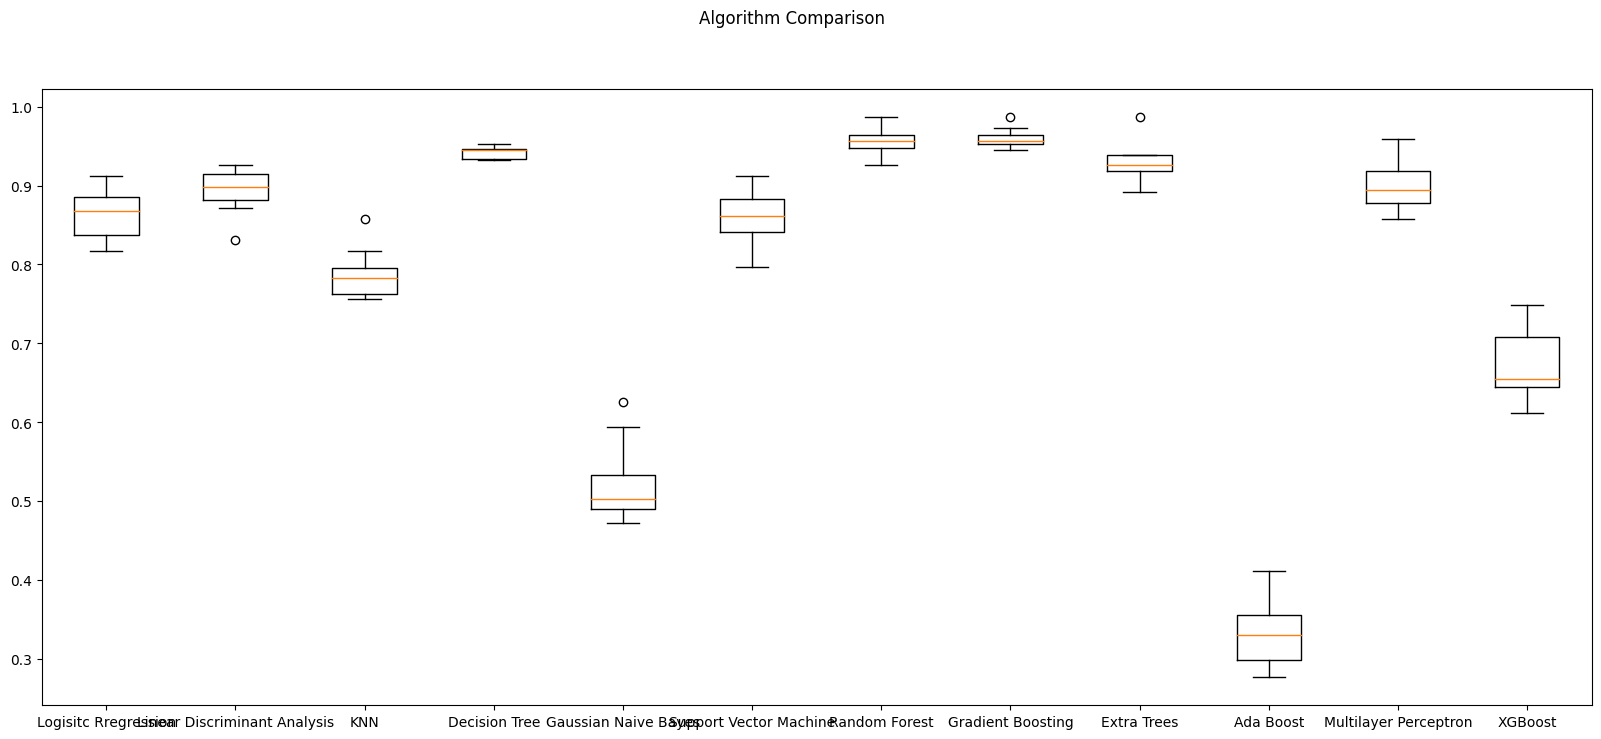

In [91]:
from sklearn import linear_model
from sklearn import svm
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import ensemble
from sklearn import discriminant_analysis
from sklearn import gaussian_process
from sklearn import tree
from sklearn import neural_network
from sklearn import model_selection
from sklearn import metrics

# list classification models
def classification_models():
    models = []
    models.append(('Logisitc Rregression', linear_model.LogisticRegression()))
    models.append(('Linear Discriminant Analysis', discriminant_analysis.LinearDiscriminantAnalysis()))
    models.append(('KNN', neighbors.KNeighborsClassifier()))
    models.append(('Decision Tree', tree.DecisionTreeClassifier()))
    models.append(('Gaussian Naive Bayes', naive_bayes.GaussianNB()))
    models.append(('Support Vector Machine', svm.SVC()))
    models.append(('Random Forest', ensemble.RandomForestClassifier()))
    models.append(('Gradient Boosting', ensemble.GradientBoostingClassifier()))
    models.append(('Extra Trees', ensemble.ExtraTreesClassifier()))
    models.append(('Ada Boost', ensemble.AdaBoostClassifier()))
    models.append(('Multilayer Perceptron', neural_network.MLPClassifier()))
    models.append(('XGBoost', linear_model.SGDClassifier()))
    return models

# evaluate each model in turn
performances_scoring = {}
performances_scoring_crosval = []
names = []
best_algorithm = 0
best_algorithm_crossval = 0
best_perf = 0
best_perf_crossval = 0
scoring = 'accuracy'
for name, model in classification_models():
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    performances_scoring_crosval.append(cv_results)
    names.append(name)
    model.fit(X_train, y_train)
    performance = model.score(X_test, y_test)
    if cv_results.mean() >  best_perf_crossval:
            best_algorithm_crossval = model
            best_perf_crossval = cv_results.mean()
    if performance >  best_perf:
            best_algorithm = model
            best_perf = performance
    if 0<performance and performance<1:
        performances_scoring[name] = [performance]
    
    msg_crossvalidation = "Accuracy through cross validation %s: %f" % (name, cv_results.mean())
    msg = "Accuracy scoring %s: %f" % (name, performance)
    print(msg)
    print(msg_crossvalidation)
    print ("="*30)

# boxplot algorithm comparison
fig = plt.figure(figsize=(20, 8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(performances_scoring_crosval)
ax.set_xticklabels(names)
plt.show()


In [92]:
best_algorithm, best_perf

(GradientBoostingClassifier(), 0.9400630914826499)

In [93]:
best_algorithm_crossval, best_perf_crossval

(GradientBoostingClassifier(), 0.9593905129619416)

# Comparaison des algorithmes

In [94]:
df_algorithms = pd.DataFrame(performances_scoring).T
col_name = "performance"
df_algorithms.columns = [col_name]
df_algorithms = df_algorithms.performance.sort_values()
df_algorithms

Ada Boost                       0.358044
Gaussian Naive Bayes            0.550473
XGBoost                         0.645110
KNN                             0.805994
Logisitc Rregression            0.858044
Support Vector Machine          0.859621
Linear Discriminant Analysis    0.884858
Multilayer Perceptron           0.906940
Decision Tree                   0.914826
Extra Trees                     0.925868
Random Forest                   0.935331
Gradient Boosting               0.940063
Name: performance, dtype: float64

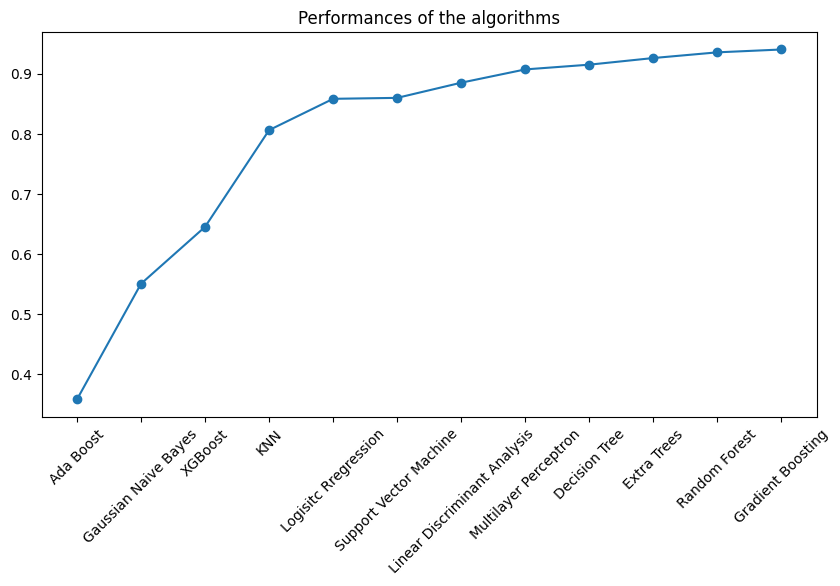

In [95]:
ax = df_algorithms.plot(figsize=(10, 5), title="Performances of the algorithms", rot=45, x_compat=True, marker="o")
ax.set_xticks(range(len(df_algorithms)))
ax.xaxis.set_ticklabels(df_algorithms.index)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

/var/folders/dp/v7br1gzx259bmsgljb9hv28r0000gn/T/ipykernel_31925/2219464027.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.xaxis.set_ticklabels(df_algorithms.index)


<AxesSubplot:>

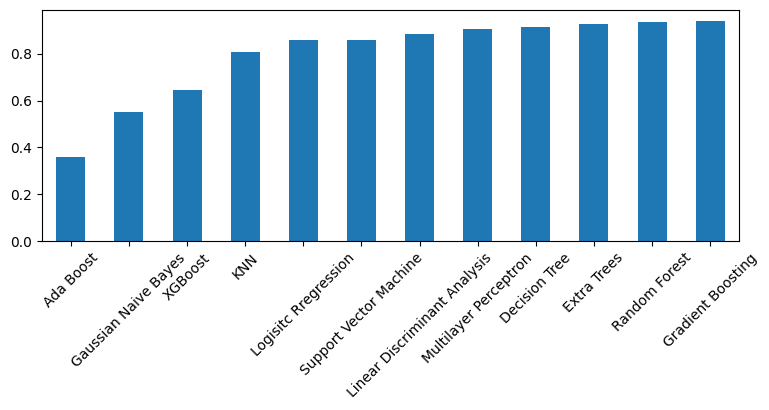

In [96]:
fig , axes = plt.subplots(1,1)
fig.set_size_inches(9,3)
axes.xaxis.set_ticklabels(df_algorithms.index)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
df_algorithms.plot(kind='bar', rot=45, ax=axes)

# Tuning best model hyperparameters

In [97]:
hyperparametres = {
    'loss': ['log_loss','exponential'],
    'learning_rate': [10, 1, 0.1, 0.01, 0.001],
    'n_estimators': [10, 100, 1000],
    'subsample': [0.1, 0.5, 1.0],
    'criterion': ['friedman_mse', 'square_error'],
    'max_features': ['sqrt', 'log2', None],

}
model = ensemble.GradientBoostingClassifier()
test_hyperparametres(model, hyperparametres)

/opt/homebrew/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
2025 fits failed out of a total of 2700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
675 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_gb.py", line 577, in fit
    self._check_params()
  File "/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_gb.py", line 331, in _check_params
    self._loss = loss_class(self.n_classes_)
  File "/opt/homebrew/lib/python3.10/

Best score: 0.9614109024278517
Best hyperparametres: {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'log_loss', 'max_features': None, 'n_estimators': 1000, 'subsample': 0.5}
Best estimator: GradientBoostingClassifier(n_estimators=1000, subsample=0.5)


(0.9614109024278517,
 {'criterion': 'friedman_mse',
  'learning_rate': 0.1,
  'loss': 'log_loss',
  'max_features': None,
  'n_estimators': 1000,
  'subsample': 0.5},
 GradientBoostingClassifier(n_estimators=1000, subsample=0.5))

In [56]:
hyperparametres = {
    'loss': ['log_loss'],
    'learning_rate': [1, 0.1, 0.01],
    'n_estimators': [100, 1000, 5000],
    'subsample': [0.1, 0.5, 1.0],
    'criterion': ['friedman_mse'],
    'max_features': ['sqrt', 'log2'],

}
model = ensemble.GradientBoostingClassifier()
test_hyperparametres(model, hyperparametres)

Best score: 0.9620888685295466
Best hyperparametres: {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'log_loss', 'max_features': 'log2', 'n_estimators': 1000, 'subsample': 0.5}
Best estimator: GradientBoostingClassifier(max_features='log2', n_estimators=1000,
                           subsample=0.5)


(0.9620888685295466,
 {'criterion': 'friedman_mse',
  'learning_rate': 0.1,
  'loss': 'log_loss',
  'max_features': 'log2',
  'n_estimators': 1000,
  'subsample': 0.5},
 GradientBoostingClassifier(max_features='log2', n_estimators=1000,
                            subsample=0.5))

# Prediction with best accuracy algorithm we found

In [98]:
model = ensemble.GradientBoostingClassifier(criterion= 'friedman_mse', learning_rate= 0.1, loss= 'log_loss', max_features= 'log2', n_estimators= 1000, subsample= 0.5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy through cross-validation score : ", cross_val_score(model, X_train, y_train).mean())
print("Basic accuracy score : ", accuracy_score(y_test, y_pred))
print("Matrice de confusion \n", confusion_matrix(y_test, y_pred))
print("\nClassification report \n", classification_report(y_test, y_pred))

Accuracy through cross-validation score :  0.9641227668346313
Basic accuracy score :  0.9463722397476341
Matrice de confusion 
 [[84  2  0  0  0  0  0]
 [ 1 84  0  0  0  8  0]
 [ 0  0 96  2  0  4  0]
 [ 0  0  0 88  0  0  0]
 [ 0  0  0  1 97  0  0]
 [ 0  6  0  0  0 80  2]
 [ 0  3  2  0  0  3 71]]

Classification report 
                      precision    recall  f1-score   support

Insufficient_Weight       0.99      0.98      0.98        86
      Normal_Weight       0.88      0.90      0.89        93
     Obesity_Type_I       0.98      0.94      0.96       102
    Obesity_Type_II       0.97      1.00      0.98        88
   Obesity_Type_III       1.00      0.99      0.99        98
 Overweight_Level_I       0.84      0.91      0.87        88
Overweight_Level_II       0.97      0.90      0.93        79

           accuracy                           0.95       634
          macro avg       0.95      0.95      0.95       634
       weighted avg       0.95      0.95      0.95       634

